In [3]:
import tensorflow as tf
import datetime

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend

from sklearn.metrics import classification_report
from tensorflow.keras.metrics import FalseNegatives, FalsePositives, TrueNegatives, TruePositives

In [4]:
from src.extract_to_df import extract_to_df
from src.visualizations import plot_graph
from src.metric_notes import metric_note

In [5]:
#prevent a bug that some images are truncated
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
test = Path('Data/test')
train = Path('Data/train')
valid = Path('Data/valid')

In [7]:
train_df = extract_to_df(train, 'Train')
test_df = extract_to_df(test, 'Test')
val_df = extract_to_df(valid,'Valid')

In [8]:
pixel = 64
size = f'{pixel}x{pixel}'

In [9]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [10]:
generator = ImageDataGenerator(
    rescale = 1./255
)

In [11]:
train_images = generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'Path',
                                                 y_col = 'Label',                           
                                                 target_size = (pixel,pixel),
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb',
                                                 shuffle = True,
                                                 seed = 42,
                                                 batch_size = 128)

valid_images = generator.flow_from_dataframe(dataframe=val_df,
                                                 x_col = 'Path',
                                                 y_col = 'Label',                           
                                                 target_size=(pixel,pixel),
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb',
                                                 shuffle = True,
                                                 seed = 42,
                                                 batch_size = 64)

test_images = generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Path',
                                                 y_col='Label',
                                                 target_size=(pixel,pixel),
                                                 class_mode='binary',
                                                 color_mode='rgb',
                                                 shuffle=True,
                                                 seed=42,
                                                 batch_size=128)

Found 30250 validated image filenames belonging to 2 classes.
Found 6300 validated image filenames belonging to 2 classes.
Found 6300 validated image filenames belonging to 2 classes.


In [12]:
metrics = metric_note(train_images, test_images, valid_images)

In [13]:
cnn1 = Sequential()
cnn1.add(Conv2D(filters=16,
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(pixel,pixel, 3)))

cnn1.add(Flatten())
cnn1.add(Dense(1, activation='sigmoid'))

cnn1.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', TruePositives(thresholds= .5), TrueNegatives(thresholds= .5), FalsePositives(thresholds= .5), FalseNegatives(thresholds= .5)])

In [14]:
early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=4,
            restore_best_weights=True
        )

tensor = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [15]:
results1 = cnn1.fit(train_images,
                    batch_size = 64, 
                    epochs = 50,
                    validation_data = valid_images,
                    callbacks = [early_stop, tensor],
                    workers = 6)

Epoch 1/50
237/237 [==============================] - 78s 297ms/step - loss: 0.3003 - accuracy: 0.8782 - true_positives: 14108.0000 - true_negatives: 12459.0000 - false_positives: 2041.0000 - false_negatives: 1642.0000 - val_loss: 0.2343 - val_accuracy: 0.9089 - val_true_positives: 3131.0000 - val_true_negatives: 2595.0000 - val_false_positives: 225.0000 - val_false_negatives: 349.0000
Epoch 2/50
237/237 [==============================] - 12s 49ms/step - loss: 0.2285 - accuracy: 0.9138 - true_positives: 14789.0000 - true_negatives: 12854.0000 - false_positives: 1646.0000 - false_negatives: 961.0000 - val_loss: 0.2025 - val_accuracy: 0.9229 - val_true_positives: 3257.0000 - val_true_negatives: 2557.0000 - val_false_positives: 263.0000 - val_false_negatives: 223.0000
Epoch 3/50
237/237 [==============================] - 12s 48ms/step - loss: 0.2028 - accuracy: 0.9226 - true_positives: 14917.0000 - true_negatives: 12991.0000 - false_positives: 1509.0000 - false_negatives: 833.0000 - val_l

In [18]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


99/99 [==============================] - 9s 88ms/step - loss: 0.3397 - accuracy: 0.9248 - true_positives: 3279.0000 - true_negatives: 2547.0000 - false_positives: 273.0000 - false_negatives: 201.0000


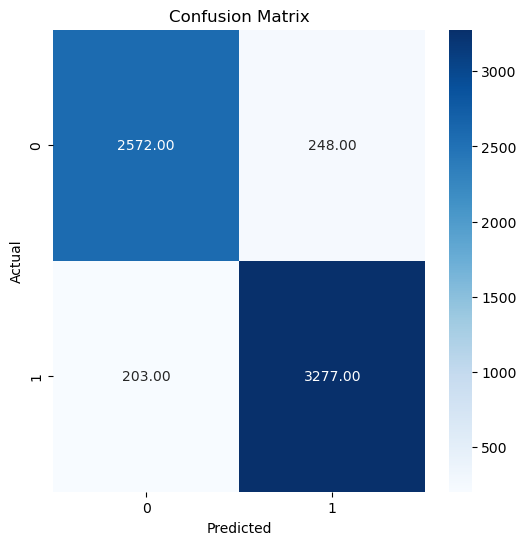

In [19]:
metrics.evaluate(cnn1, 'CNN 1 base', size)

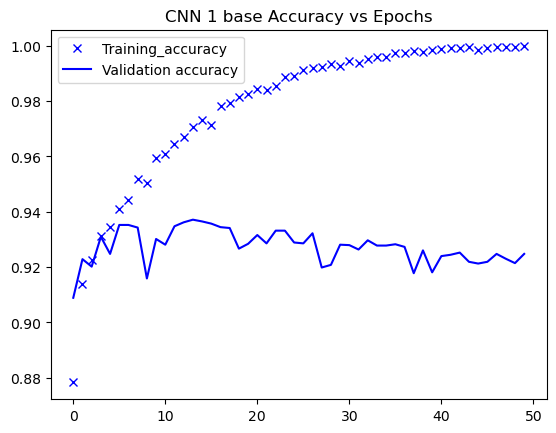

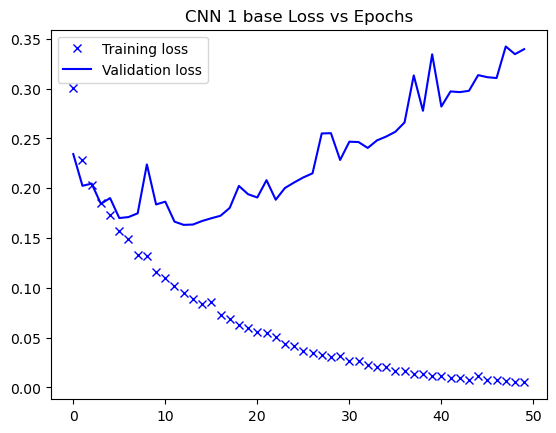

<Figure size 640x480 with 0 Axes>

In [20]:
plot_graph(results1, size, 'CNN 1 base')

In [2]:
metrics.printout

NameError: name 'metrics' is not defined